In [1]:
#패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#글씨체 설정

matplotlib.rc('font', family="Malgun Gothic")
plt.rc('font', family = 'Malgun Gothic')

# 회귀분석

In [51]:
#데이터 불러오기

df = pd.read_csv ('체질검사.csv', engine='python', encoding='euc-KR')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df.info()

#결측치 없음, 14개의 변수, 전부 실수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [19]:
# BMI 수치 데이터 추가

df['BMI'] = (df['WEIGHT']*0.45)/((df['HEIGHT']*2.54/100)*(df['HEIGHT']*2.54/100))

In [20]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
 14  BMI      252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


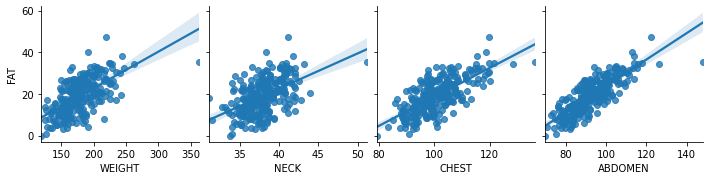

In [26]:
#버전이 바뀌면서 첫번째 그래프가 안나오는데, 나오게 하는 법, diag_kind=None
#선도 그려주는 것, kind='reg'

sns.pairplot(df, y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'], diag_kind=None, kind='reg')

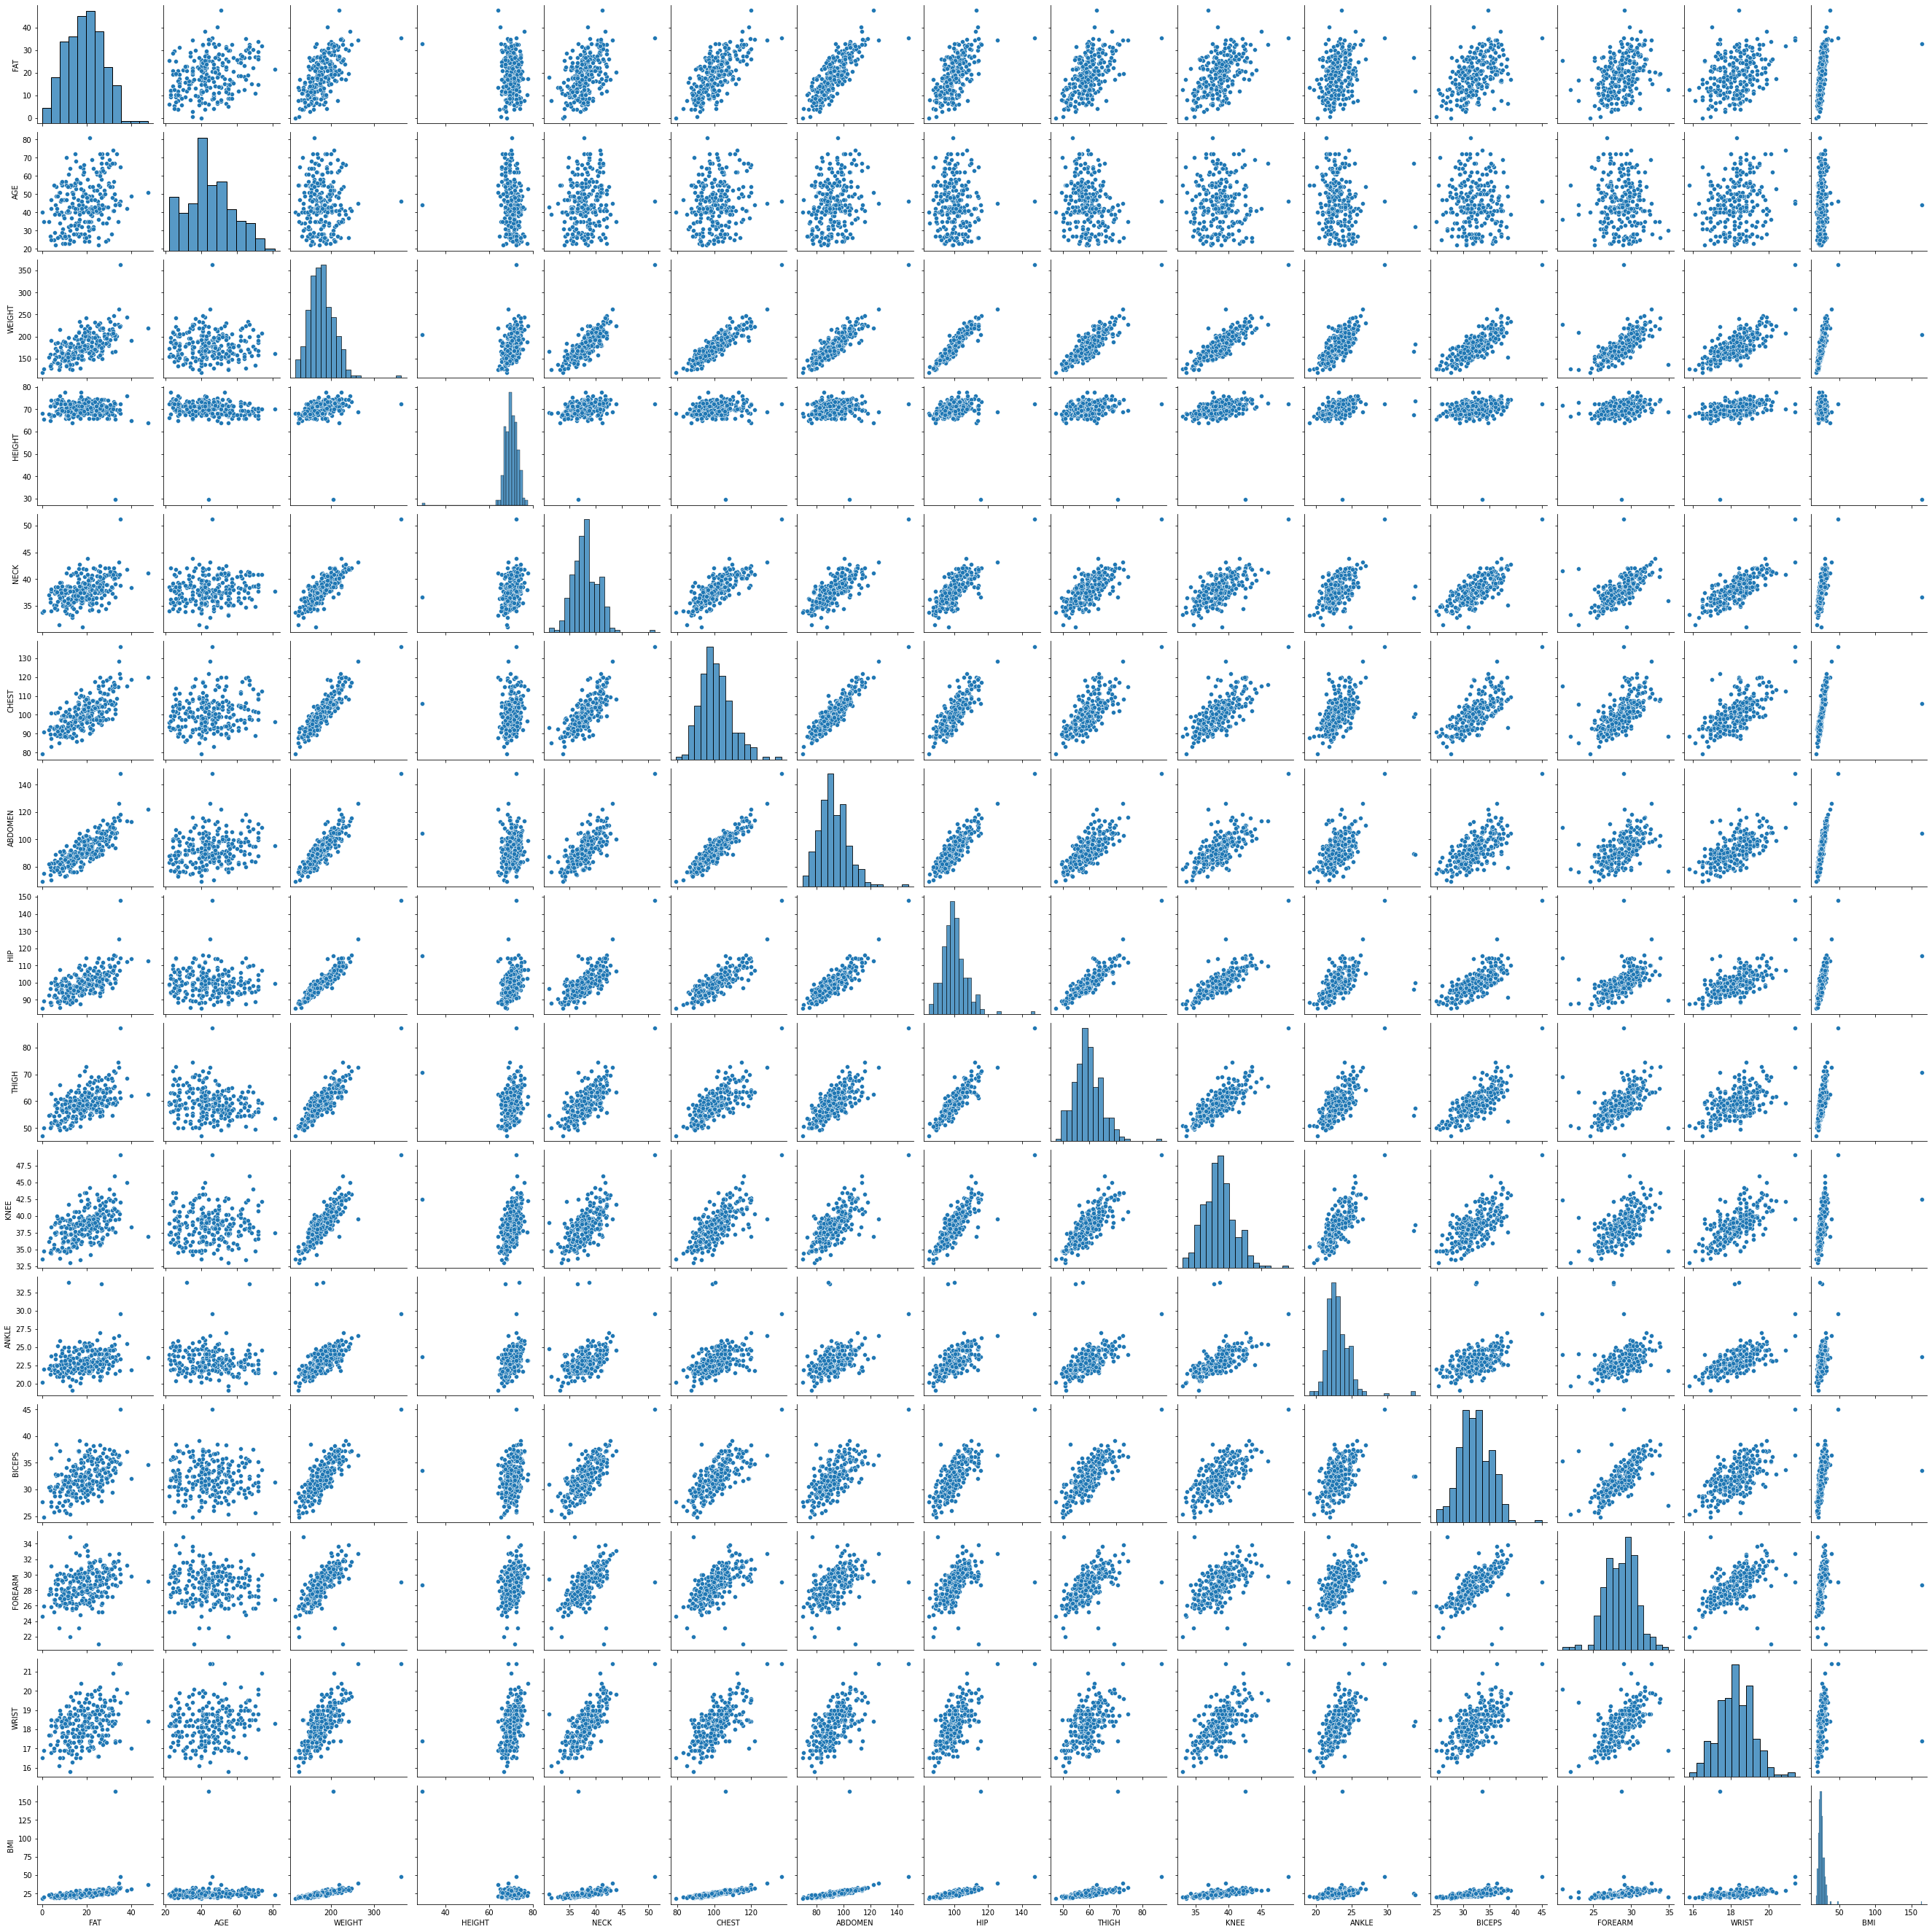

In [23]:
# 전체 변수 간의 경향성 파악하기 
# FAT와 선형관계가 있는 설명변수, 설명변수 간의 선형관계 확인

sns.pairplot(df)

In [27]:
#변수 간의 경향성 파악 (상관관계 분석)

df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


In [29]:
#변수 간의 상관계수가 높은 것들만 출력하여 확인한다.
#대각 성분인 1을 제외한, 나머지에서 높은 상관관계를 확인 할 수 있고, 이에 대한 다중공선성 확인이 필요하다.

df.corr()[df.corr() > 0.8]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000000,NaN,NaN,NaN,NaN,NaN,0.813432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEIGHT,NaN,NaN,1.000000,NaN,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,NaN,0.800416,NaN,NaN,NaN
HEIGHT,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NECK,NaN,NaN,0.830716,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHEST,NaN,NaN,0.894191,NaN,NaN,1.000000,0.915828,0.829420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABDOMEN,0.813432,NaN,0.887995,NaN,NaN,0.915828,1.000000,0.874066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HIP,NaN,NaN,0.940884,NaN,NaN,0.829420,0.874066,1.000000,0.896410,0.823473,NaN,NaN,NaN,NaN,NaN
THIGH,NaN,NaN,0.868694,NaN,NaN,NaN,NaN,0.896410,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
KNEE,NaN,NaN,0.853167,NaN,NaN,NaN,NaN,0.823473,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [30]:
#선형회귀분석 formula(y~x1+x2+...)이용. 상수항은 자동추가
#적합한 지 확인

formula = 'FAT ~ AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI'
reg_model = smf.ols(formula,data=df)
reg_result= reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 18 May 2021   Prob (F-statistic):           5.49e-63
Time:                        19:26:48   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

### 분석 자료 수는 252개 (No. Observations)
### 잔차 자유도 237 (Df Residuals)
### 모델 자유도 14 (Df Model)
### 잔차의 정규성 확보 Prob(Omnibus): 0.118 > 0.05
### 자기상관성 (잔차의 독립성 확인, 4에 가까우면 음의 자기상관성, 0에 가까우면 양의 자기상관성, 2에 가까우면 독립성) Durbin-Watson: 2.113
### p-value (Prob (F-statistic)) : 5.49e-63 < 0.05 이므로 회귀모델로서 유의
### 설명력 (R-squared) : 모델을 통해서 설명변수를 74.9% 설명 가능
### 회귀계수 검정 (P>|t| 값이 0.05보다 작으면 회귀모델로 유의) : ABDOMEN, FOREARM, WRIST

In [32]:
#설명변수 간의 다중공선성 확인 

df_x = df.drop('FAT', axis=1) #설명변수 간의 데이터를 위해, FAT 제거
df_x_const = add_constant(df_x) #statsmodels의 상수항 추가 함수 적용
df_vif = pd.DataFrame() #vif에 관한 데이터프레임 생성
df_vif['variable']=df_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


### WEIGHT의 52.665이고, HIP 또한 14.890으로 높으므로, 변수와 특성, 영향을 고려하여 모델에서 제외 검토 (하나 제외)

In [34]:
#다중공선성이 높은 변수 제거(WEIGHT 제거 + FAT는 설명변수가 아니므로 잠시 제거)

df_x = df.drop(['FAT','WEIGHT'], axis=1)
df_x_const = add_constant(df_x) #statsmodels의 상수항 추가 함수 적용
df_vif = pd.DataFrame() #vif에 관한 데이터프레임 생성
df_vif['variable']=df_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


### HIP의 VIF도 낮아지면서, 다중공선성 문제가 거의 해결됨

In [35]:
#weight제외 시켜서 해봄

formula = 'FAT ~ AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI'
reg_model2 = smf.ols(formula,data=df)

reg_result2= reg_model2.fit()
print(reg_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.29e-63
Time:                        19:47:45   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

### 분석 자료 수는 252개 (No. Observations)
### 잔차 자유도 238 (Df Residuals)
### 모델 자유도 13 (Df Model)
### 잔차의 정규성 확보 Prob(Omnibus): 0.261 > 0.05
### 자기상관성 (잔차의 독립성 확인, 4에 가까우면 음의 자기상관성, 0에 가까우면 양의 자기상관성, 2에 가까우면 독립성) Durbin-Watson: 2.101
### p-value (Prob (F-statistic)) : 2.29e-63 < 0.05 이므로 회귀모델로서 유의
### 설명력 (R-squared) : 모델을 통해서 설명변수를 74.7% 설명 가능
### 회귀계수 검정 (P>|t| 값이 0.05보다 작으면 회귀모델로 유의) : AGE, NECK, ABDOMEN, HIP, WRIST

In [37]:
#후진제거법을 이용한 변수 선택
#RFE는 입력된 모델을 변수중요도가 낮은 순서대로 제거해주는 함수이다.

df_y = df['FAT'] #목표변수 분리
model = LinearRegression() #sklearn의 선형회귀 모델
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_x,df_y) #전체 변수 중 5개의 변수가 남을 때까지 선택 의미

selected_cols = df_x.columns[rfe.support_] #선택된 변수
removed_cols = df_x.columns[~rfe.support_] #제거된 변수


print("Selcted Variables :{}".format(selected_cols))
print("Removed Variables :{}".format(removed_cols))

Selcted Variables :Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables :Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


### 따라서, MECK, ABDOMEN, HIP, FOREARM, WRIST 를 설명변수로 선택한다.

In [38]:
#후진제거법을 통해 선택된 설명변수를 이용한 회귀 모델 생성
#적합한 지 확인

rfe_reg_model = smf.ols('FAT ~ NECK+ABDOMEN+HIP+FOREARM+WRIST',data=df)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 18 May 2021   Prob (F-statistic):           4.38e-68
Time:                        19:57:22   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

### 분석 자료 수는 252개 (No. Observations)
### 잔차 자유도 246 (Df Residuals)
### 모델 자유도 5 (Df Model)
### 잔차의 정규성 확보 Prob(Omnibus): 0.158 > 0.05
### 자기상관성 (잔차의 독립성 확인, 4에 가까우면 음의 자기상관성, 0에 가까우면 양의 자기상관성, 2에 가까우면 독립성) Durbin-Watson: 2.128
### p-value (Prob (F-statistic)) : 4.38e-68 < 0.05 이므로 회귀모델로서 유의
### 설명력 (R-squared) : 모델을 통해서 설명변수를 73.1% 설명 가능
### 회귀계수 검정 (P>|t| 값이 0.05보다 작으면 회귀모델로 유의) : 절편을 제외한 모든 설명변수의 회귀계수가 0.05보다 작아서 유의

In [45]:
#결론 도출 (설명변수의 중요도 (표준화 적용 이전, 비표준화 회귀계수 기준) 확인)

df_reg_coef=pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]},index=selected_cols)
df_reg_coef.round(3)

,Coef
NECK,-0.601
ABDOMEN,0.974
HIP,-0.332
FOREARM,0.409
WRIST,-1.618


### 따라서 최종 모델의 회귀식은
## ^y = 2.7037 - 0.601NECK + 0.974ABDOMEN - 0.332HIP + 0.409FOREARM -1.618WRIST

<AxesSubplot:>

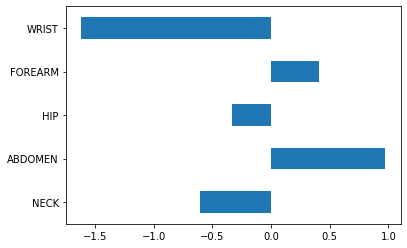

In [44]:
#시각화

df_reg_coef.plot.barh(y='Coef', legend=False)

## 중요도는 회귀계수의 절대값 크기이므로, 
## WRIST가 적을수록, ABDOMEN이 높을수록, FAT가 높음을 알 수 있다.

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 18 May 2021   Prob (F-statistic):           4.38e-68
Time:                        20:11:05   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

<AxesSubplot:>

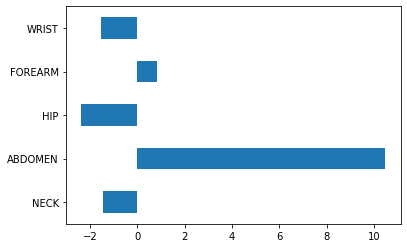

In [47]:
#표준화 회귀계수 기준 변수 중요도 확인 > 표준화 회귀계수 산출을 위해

scaler = StandardScaler() 
cols = df_x.columns 

#scale 변환
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)

#목표변수 FAT 추가
df_scaled['FAT']=df['FAT']
reg_model_scaled =smf.ols(formula='FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST',data=df_scaled)
reg_result_scaled =reg_model_scaled.fit()
print(reg_result_scaled.summary())

df_reg_coef=pd.DataFrame({'Coef': reg_result_scaled.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=False)

### 회귀계수의 방향은 동일하나, 중요도 크기는 변했다.
### ABDOMEN의 중요도 증가, WRIST의 중요도 감소하였다. (모델의 통계량은 변화없다.)

# 
# 의사결정 나무

In [50]:
#데이터 불러오기

df_raw = pd.read_csv ('Concrete.csv', engine='python', encoding='euc-KR')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [53]:
#패키지 불러오기

import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [62]:
#목표변수와 설명변수 지정

df_raw_y = df_raw['strength'] #목표변수
df_raw_x = df_raw.drop('strength', axis=1, inplace=False) #설명변수

In [63]:
#데이터 구성하기

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (618, 8)
train data Y size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


In [64]:
#기본 옵션으로 모델 생성

tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x,df_test_y)))


Score on training set: 0.996
Score on test set: 0.790


## train 모델 설명력은 99.6%, test 모델 설명력은 79.0%로 모델은 train 데이터에 과대적합하다.

In [67]:
#모델 parameter 조정
#min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

#잎사귀 노드의 최소 자료 수 : min_samples_leaf

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
    
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrianScore'] = train_score
df_score_leaf['TestScore'] =test_score

#모델 설명력 확인
df_score_leaf.round(3)


,MinSamplesLeaf,TrianScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


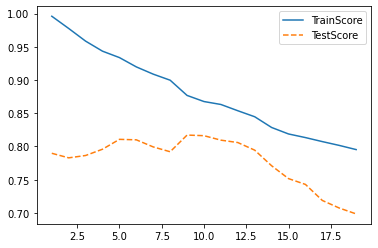

In [68]:
#모델 설명력 그래프로 보기 쉽게 확인

plt.plot(para_leaf, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'TestScore')
plt.legend()

## 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소
## test 데이터의 성능 변화를 고려하면, 11을 선택 가능하나, train 데이터의 성능이 많이 저하됨
## train/test 데이터의 성능 변화를 고려하여 5또는 9 선택해 봄.

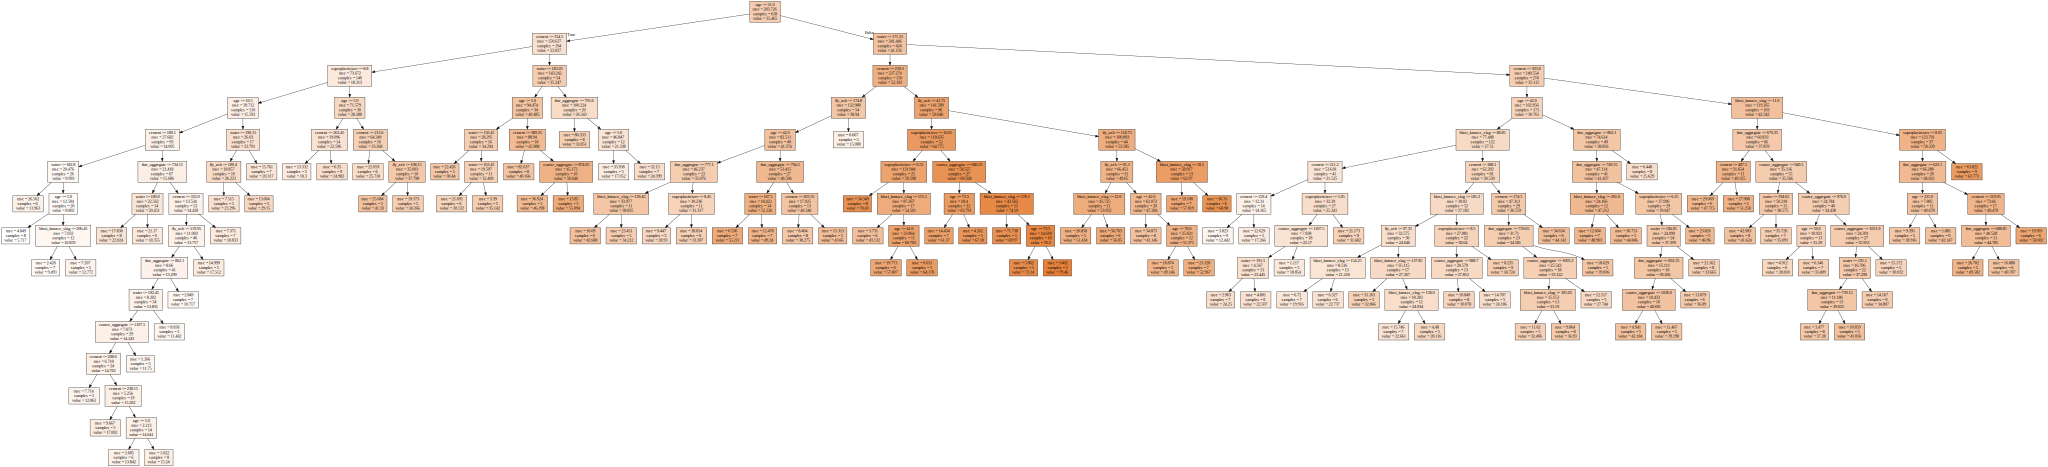

In [70]:
#변수명 저장
v_feature_name= df_train_x.columns

#노드의 최소 자료 수 = 5 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open ('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

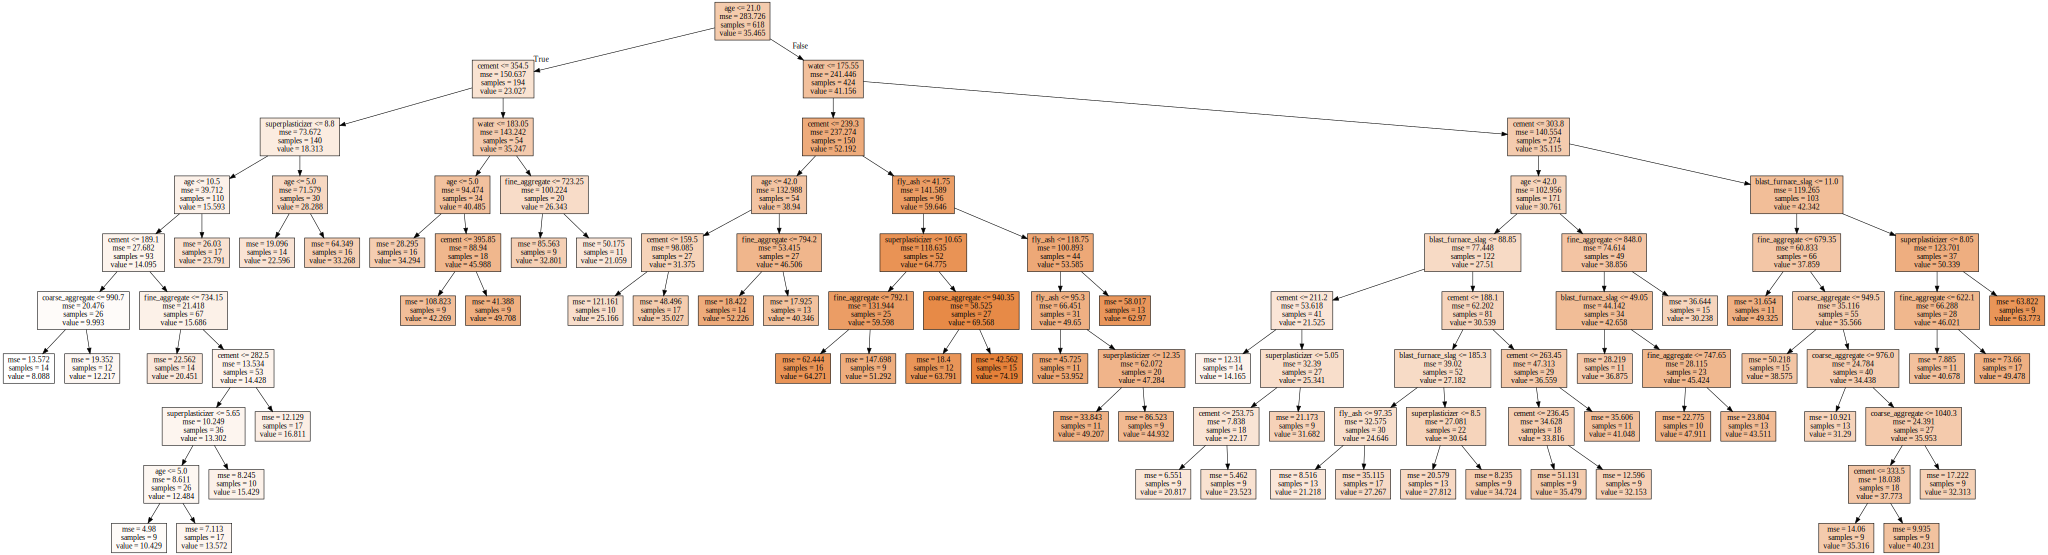

In [71]:
#노드의 최소 자료 수 = 9 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open ('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 잎사귀 노드의 최소 자료 수 = 9 가 보다 균형적으로 분리 > min_samples_leaf = 9 

In [75]:
##모델 parameter 조정
#min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

para_split = [n_split*2 for n_split in range(2,20)]

#min_samples_split : 분리 노드의 최소 자료 수

for v_min_samples_split in para_split :
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#모델의 설명력 확인
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] =para_split
df_score_split['TrainScore'] =train_score
df_score_split['TestScore'] =test_score
df_score_split.round(3) 

,MinSamplesSplit,TrainScore,TestScore
0,4,0.877,0.817
1,6,0.877,0.817
2,8,0.877,0.817
3,10,0.877,0.817
4,12,0.877,0.817
5,14,0.877,0.817
6,16,0.877,0.817
7,18,0.877,0.817
8,20,0.874,0.817
9,22,0.870,0.809


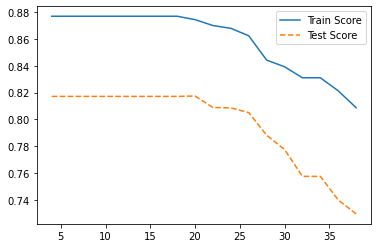

In [76]:
#모델의 설명력 그래프로 보기 쉽게 확안

plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

## 분리 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소
## 따라서, train/test 데이터의 성능 변화를 고려하여 20과 25 선정

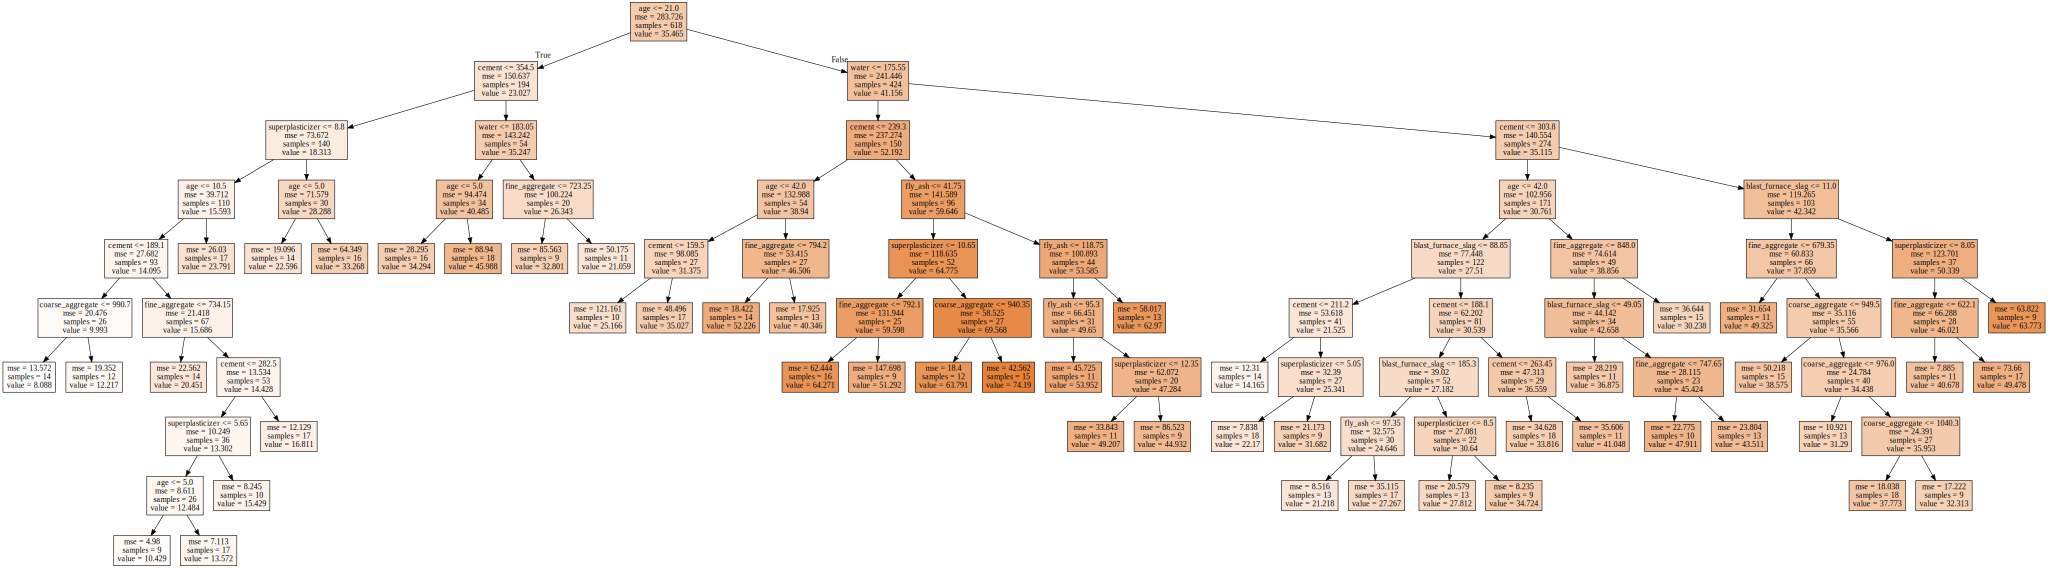

In [77]:
#분리 노드의 최소 자료 수 = 20 모델

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open ('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

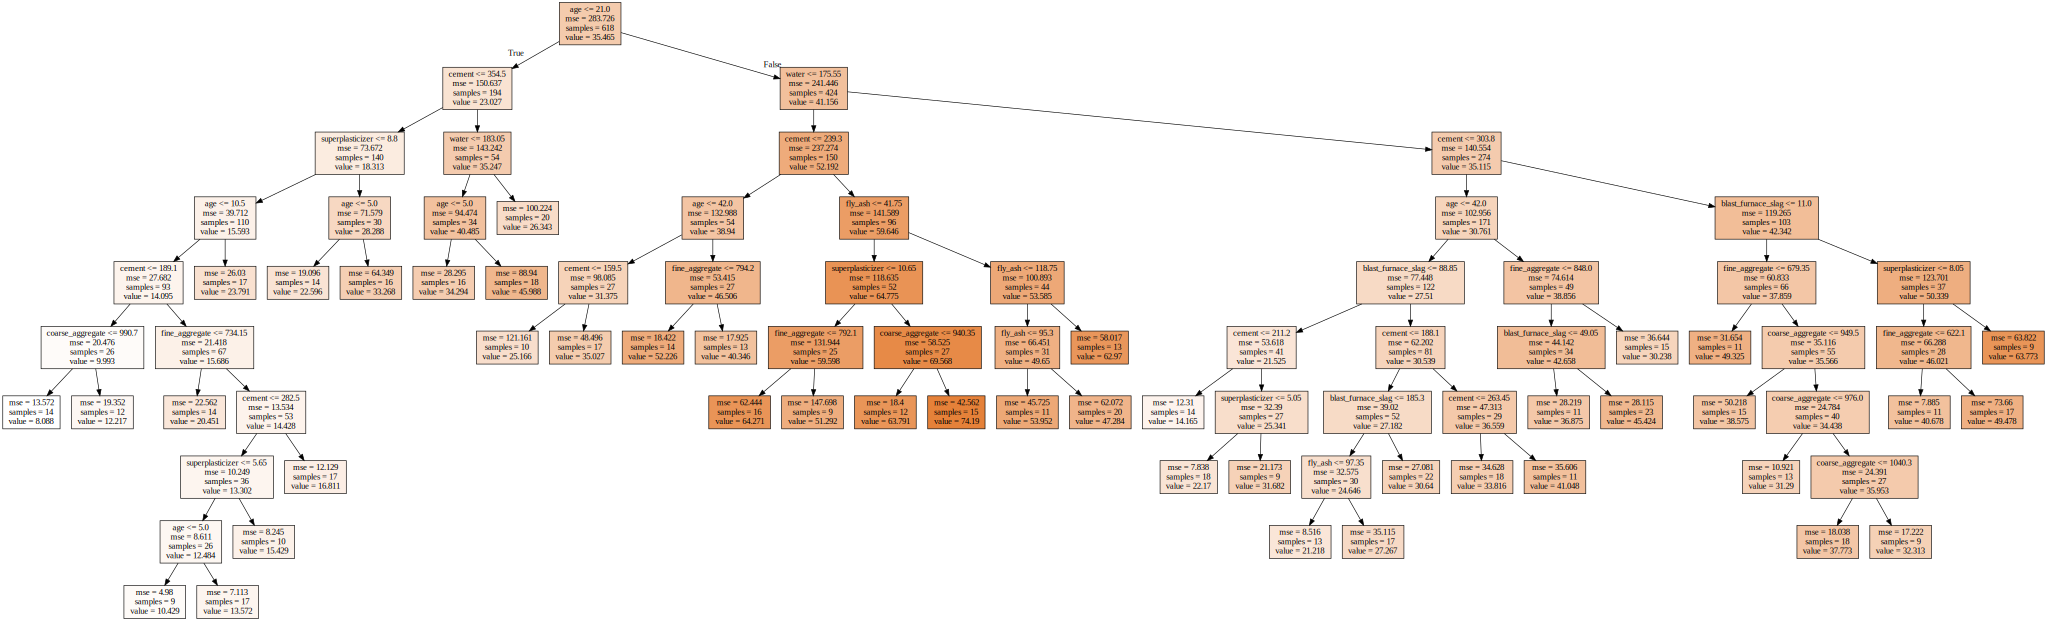

In [78]:
#분리 노드의 최소 자료 수 = 25 모델

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=25)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open ('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 분리 노드의 최소 자료 수 = 20 이 보다 자세히 분리(25는 보다 작은 나무로 과소적합 할 수 있음)
## min_samples_split=20

In [79]:
##모델 parameter 조정
#max_depth: 최대 깊이의 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth :
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

    
#모델의 설명력 확인
df_score_split = pd.DataFrame()
df_score_split['Depth'] =para_depth
df_score_split['TrainScore'] =train_score
df_score_split['TestScore'] =test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.249,0.243
1,2,0.474,0.406
2,3,0.644,0.567
3,4,0.749,0.689
4,5,0.821,0.746
5,6,0.859,0.805
6,7,0.870,0.817
7,8,0.874,0.817
8,9,0.874,0.817
9,10,0.874,0.817


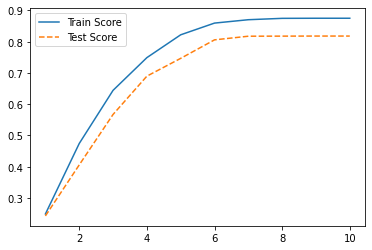

In [80]:
#모델의 설명력 그래프로 보기 쉽게 확안

plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

## 최대 깊이의 증가에 따라 모델의 설명력은 증가한다.
## 따라서, train/test 데이터의 성능 변화를 고려하여 4와 6을 선정

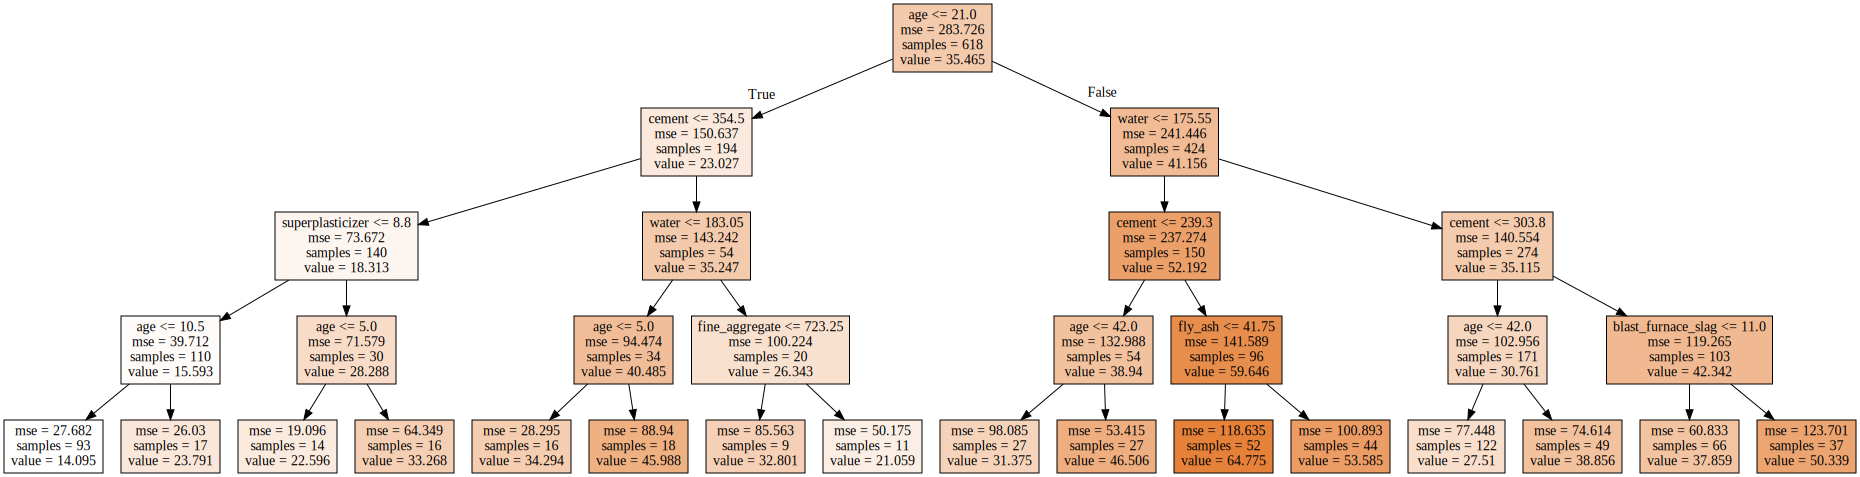

In [81]:
#최대 깊이 = 4 모델

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open ('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

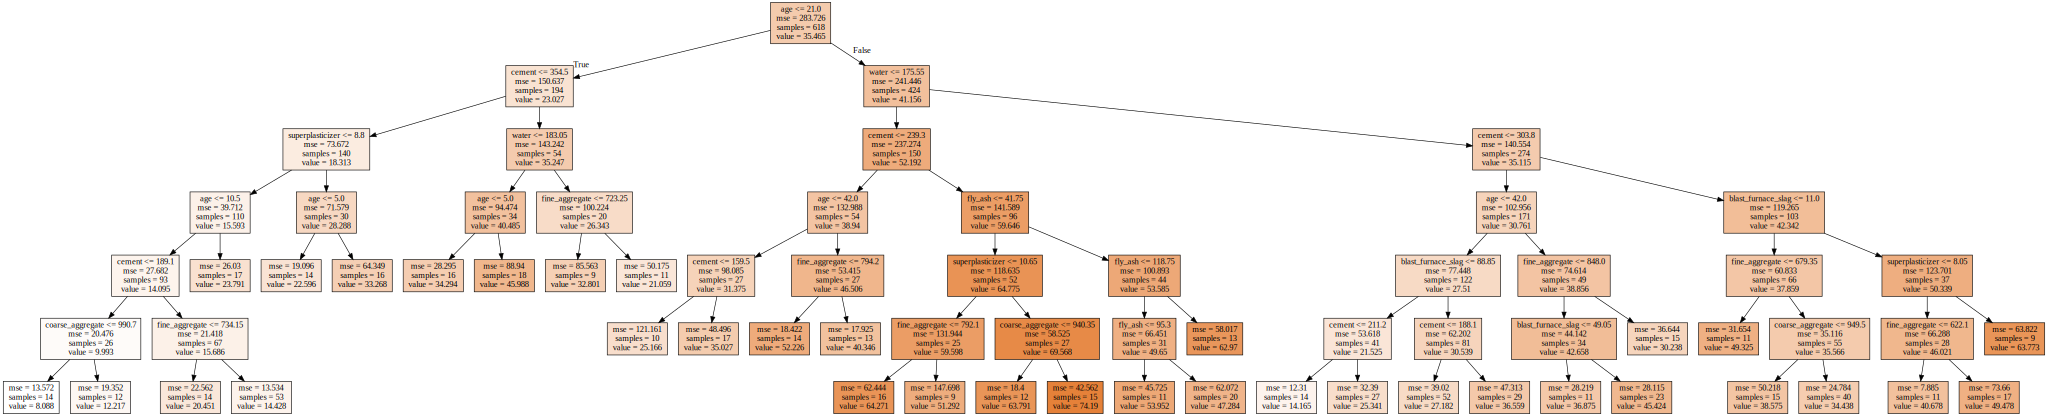

In [83]:
#최대 깊이 = 6 모델

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20, max_depth=6)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open ('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최대 깊이를 6으로 선정 (4인 경우, 분리 노드 수가 매우 적어, 과소적합 될 수 있음)
## max_depth=6

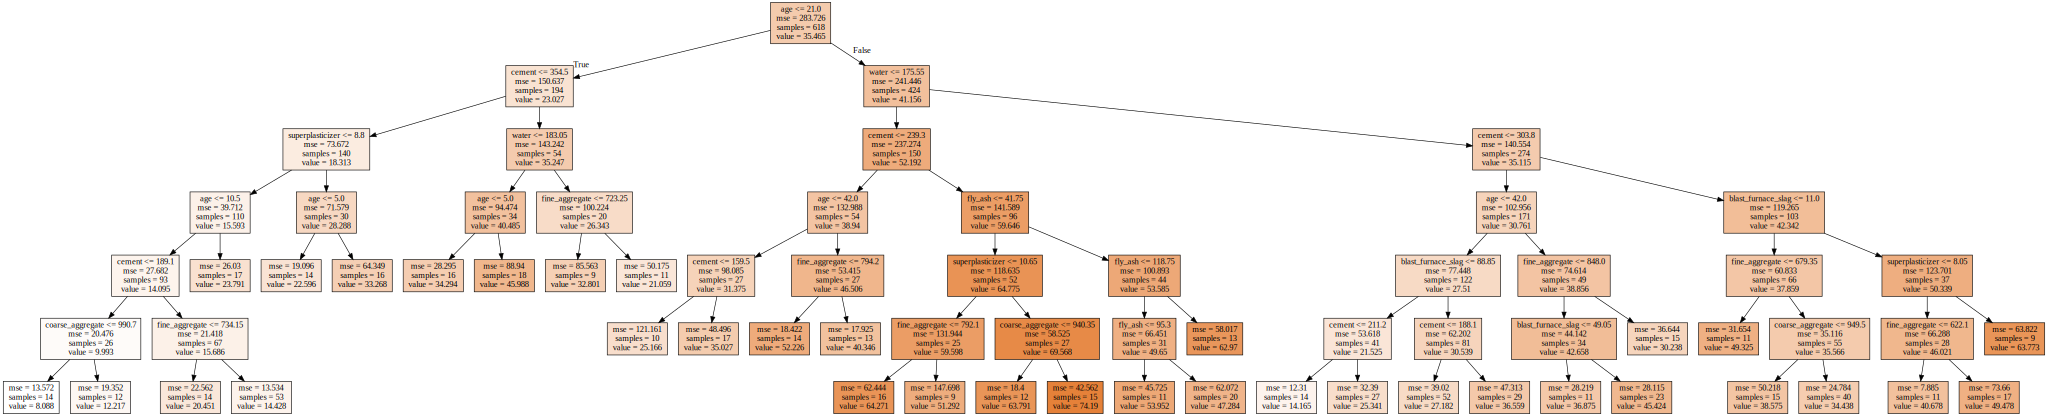

In [84]:
#최종 모델 선정
#잎사귀 노드는 9, 분리 노드는 20, 최대 깊이는 6

tree_final = DecisionTreeRegressor(min_samples_leaf=9, min_samples_split=20, max_depth=6, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

#최종 모델 시각화
export_graphviz(tree_final, out_file='tree_final.dot', feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_final.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 트리 분리에 영향이 큰 변수는 age, cement, water 등 이다.
### 좌측으로 가면 True, 우측으로 가면 False 이다.
### age<=21.0 이면 True (자료 수가 194이고, 콘크리트 강도의 평균이 35.465에서 23.027로 감소, MSE도 감소)
### age>21.0 이면 False (자료 수가 424이고, 콘크리트 강도의 평균이 35.465에서 41.156으로 증가, MSE는 감소)
### 최대 깊이가 증가하면서 생성되는 잎사귀(leaf)의 자료 수는 감소하고, 모델의 MSE 또한 지속적으로 감소 하지만, 
### 분리 조건에 따라 콘크리트의 강도는 감소하거나 증가한다. 

In [85]:
# 결론 도출
# feature_importances_ : 설명변수의 중요도

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_ #tree.feature_importances_ : 설명변수의 중요도

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3) #소수점 셋째 자리까지 구함

,Feature,Importance
7,age,0.363
0,cement,0.256
3,water,0.204
4,superplasticizer,0.048
6,fine_aggregate,0.046
1,blast_furnace_slag,0.043
2,fly_ash,0.033
5,coarse_aggregate,0.007


Text(0, 0.5, '변수')

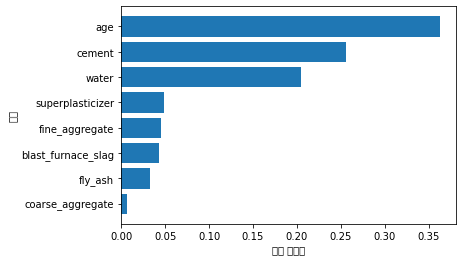

In [88]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')


### age, cement, water 순으로 영향을 준다고 해석 할 수 있다.
### 단, 계산된 변수의 중요도가 낮아도, 선택되는 데이터에 따라 중요도가 변경 될 수 있으므로, 
### 중요하지 않은 데이터로 단정지어선 안된다.

In [93]:
#parameter 조정 - 추가
#GridSearchCV 를 이용한 최적 parameter 찾기

estimator = DecisionTreeRegressor()

#구하고자 하는 parameter와 범위
param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_features':['auto','sqrt','log2'], 'max_depth':para_depth,
              'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

KeyboardInterrupt: 

### 조정은 교수님께서 수업에서 알려주지 않았는데, 추가로 혼자 해보려 했지만, 
### 자꾸 error가 떠서 나중에 다시 시도해보겠습니다ㅠㅠ..!

# 
# 랜덤 포레스트

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
#데이터 불러오기

df_raw = pd.read_csv ('Concrete.csv', engine='python', encoding='euc-KR')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [96]:
#목표변수와 설명변수 지정

df_raw_y = df_raw['strength'] #목표변수
df_raw_x = df_raw.drop('strength', axis=1, inplace=False) #설명변수

In [97]:
#데이터 구성하기

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (618, 8)
train data Y size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


In [99]:
#기본 옵션으로 모델 생성

rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

#train data 설명력
print('Score on training set :{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
#test data 설명력
print('Score on test set :{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

#모델 설명력은 train 98.0%, test 90.4%로 모델은 train 데이터와 test 데이터 모두 높은 확률이라 좋은 모델이다.

Score on training set :0.980
Score on test set :0.904


In [100]:
#모델 parameter 조정
#n_estimators : 트리 수 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

para_n_tree = [n_tree*10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree :
    rf=RandomForestRegressor(random_state=1234, n_estimators =v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과 저장, 모델 설명력 확인
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] =para_n_tree
df_score_n['TrainScore'] =train_score
df_score_n['TestScore'] =test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.973,0.905
1,20,0.978,0.905
2,30,0.979,0.903
3,40,0.979,0.905
4,50,0.980,0.905
5,60,0.980,0.906
6,70,0.980,0.906
7,80,0.980,0.906
8,90,0.980,0.905
9,100,0.980,0.904


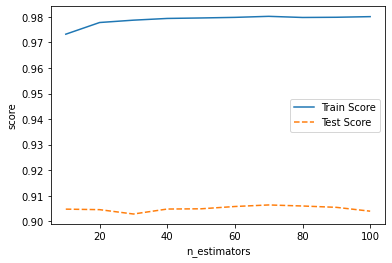

In [101]:
#모델 설명력 그래프로 확인

plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

## 생성하는 결정 트리 수 증가에 따라 모델의 설명력이 증가한다.
## 트리 수가 40개가 넘어서는 설명력이 거의 향상되지 않았으므로,
## 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향만을 확인하고자 200 선택

In [102]:
#모델 parameter 조정
#n_estimators =200 지정
#잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

#min_samples_leaf : 잎사귀 노드의 최소 자료 수
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]
for v_min_samples_leaf in para_leaf :
    rf=RandomForestRegressor(random_state=1234, n_estimators =200, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#모델 설명력 확인
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] =para_leaf
df_score_leaf['TrainScore'] =train_score
df_score_leaf['TestScore'] =test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.981,0.904
1,2,0.968,0.900
2,3,0.954,0.892
3,4,0.940,0.882
4,5,0.927,0.874
5,6,0.916,0.865
6,7,0.906,0.856
7,8,0.897,0.849
8,9,0.888,0.841
9,10,0.879,0.831


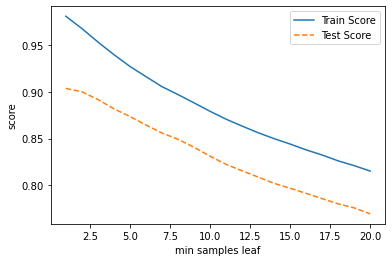

In [103]:
#모델 설명력 그래프로 확인

plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

## 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소한다.
## 따라서, test 데이터의 정확도 변화를 고려하여 8을 선정

In [104]:
#모델 parameter 조정
#min_samples_leaf=8 지정
#분리 노드의 최소 자료 수 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

# min_samples_split : 분리 노드의 최소 자료 수
para_leaf = [n_split*2 for n_split in range(2,21)]
for v_min_samples_split in para_split :
    rf=RandomForestRegressor(random_state=1234, n_estimators =200, min_samples_leaf=8, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#모델 설명력 확인
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] =para_split
df_score_split['TrainScore'] =train_score
df_score_split['TestScore'] =test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.897,0.849
1,6,0.897,0.849
2,8,0.897,0.849
3,10,0.897,0.849
4,12,0.897,0.849
5,14,0.897,0.849
6,16,0.897,0.849
7,18,0.893,0.845
8,20,0.888,0.839
9,22,0.883,0.833


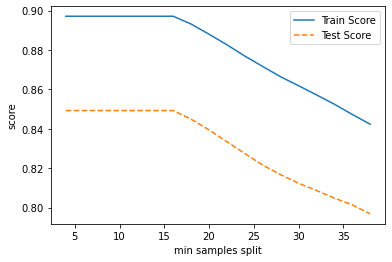

In [105]:
#모델 설명력 그래프로 확인

plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples split')
plt.legend()

## 분리 노드 최소 자료 수 증가에 따라 모델의 설명력이 감소
## 따라서, train/test 데이터의 성능 변화를 고려하여, 16 선택

In [107]:
#모델 parameter 조정
#min_samples_split=16 지정
#최대 깊이 변경에 따른 모델 성능

train_score =[] #train 설명력 결과 저장
test_score=[] #test 설명력 결과 저장

# max_depth : 최대 깊이

para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth :
    rf=RandomForestRegressor(random_state=1234, n_estimators =200, min_samples_leaf=8, min_samples_split=16, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#모델 설명력 확인    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] =para_depth
df_score_depth['TrainScore'] =train_score
df_score_depth['TestScore'] =test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.350,0.344
1,2,0.625,0.602
2,3,0.743,0.702
3,4,0.817,0.777
4,5,0.866,0.825
5,6,0.887,0.842
6,7,0.894,0.847
7,8,0.896,0.849
8,9,0.897,0.849
9,10,0.897,0.849


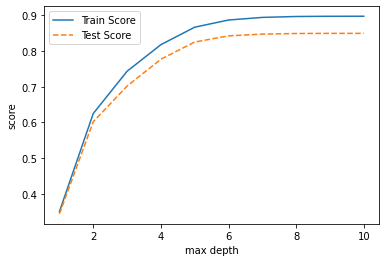

In [108]:
#모델 설명력 그래프로 확인

plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('max depth')
plt.legend()

## 최대 깊이 증가에 따라 모델의 설명력은 증가하므로
## train/test 데이터의 정확도 변화를 고려하여 6 선택

In [109]:
#결론 도출
#최종 모델 생성
#트리 수는 200, 잎사귀 노드는 8, 분리 노드는 16, 최대 깊이는 6

rf_final = RandomForestRegressor(random_state=1234,n_estimators =200, min_samples_leaf=8, min_samples_split=16, max_depth=6)
rf_final.fit(df_train_x,df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
#test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x,df_test_y)))


Score on training set : 0.887
Score on test set : 0.842


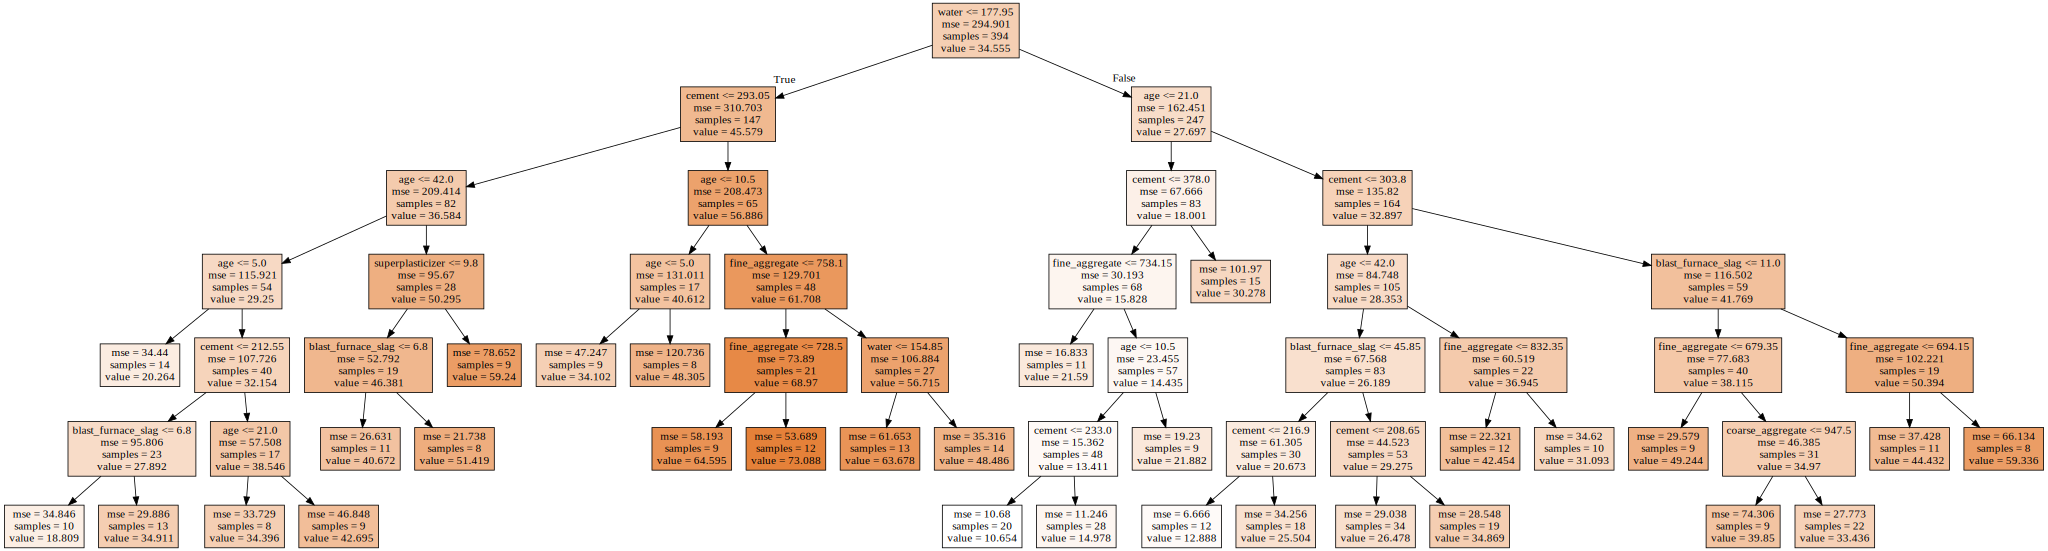

In [110]:
#생성된 트리 200개 중 임의의 3개 확인
#10번째 트리 확인 (최종모델의 10번째 트리 시각화)

v_feature_name = df_train_x.columns #변수명 저장

export_graphviz(rf_final.estimators_[10], out_file='rfr_final_10.dot', feature_names = v_feature_name, impurity=True, filled = True)
with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

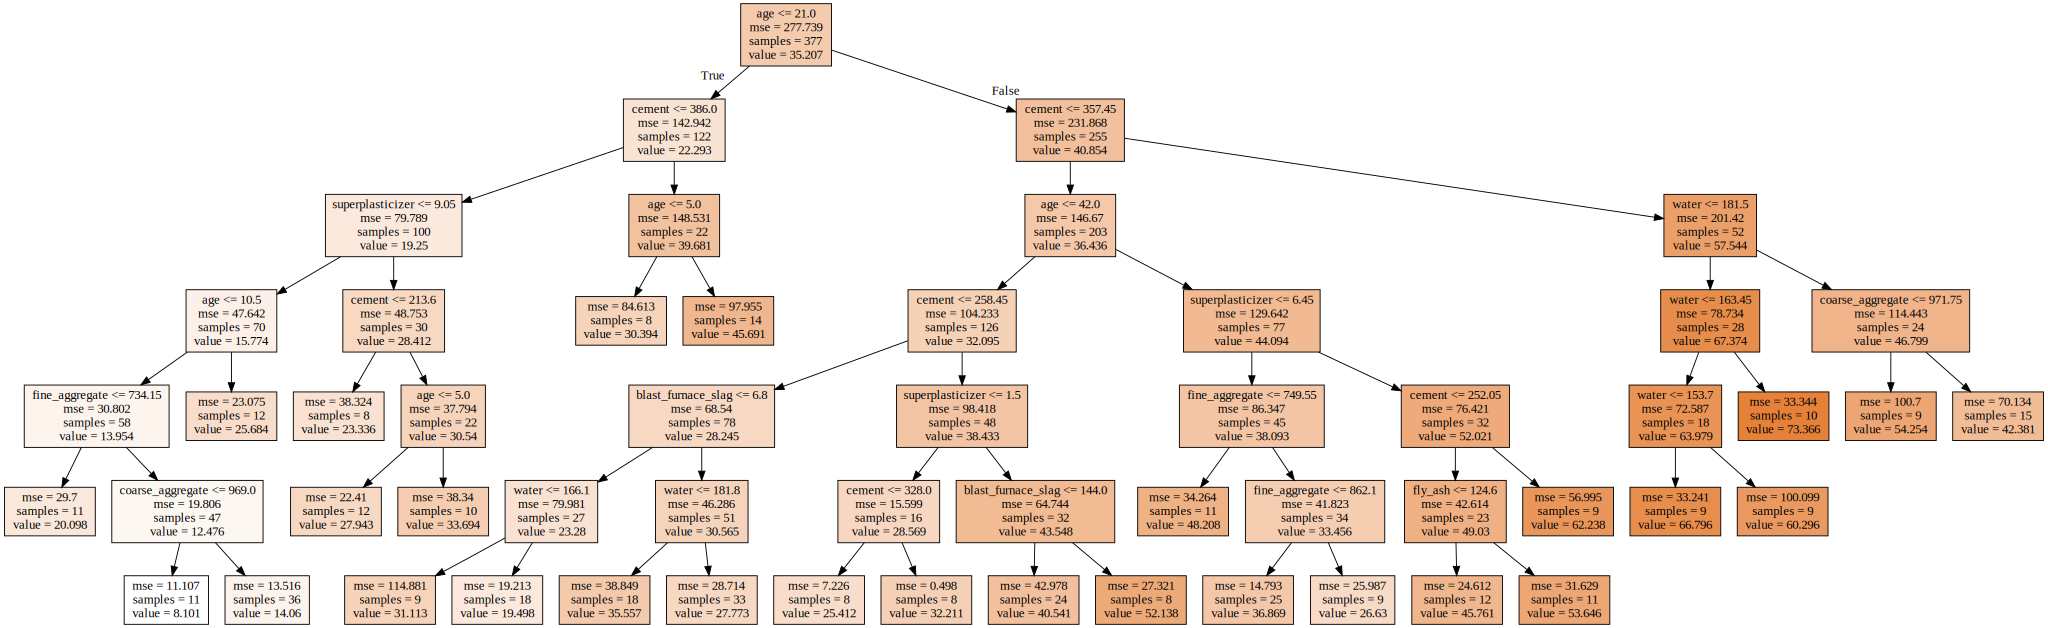

In [111]:
#생성된 트리 200개 중 임의의 3개 확인
#100번째 트리 확인 (최종모델의 100번째 트리 시각화)

v_feature_name = df_train_x.columns #변수명 저장

export_graphviz(rf_final.estimators_[100], out_file='rfr_final_100.dot', feature_names = v_feature_name, impurity=True, filled = True)
with open('rfr_final_100.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

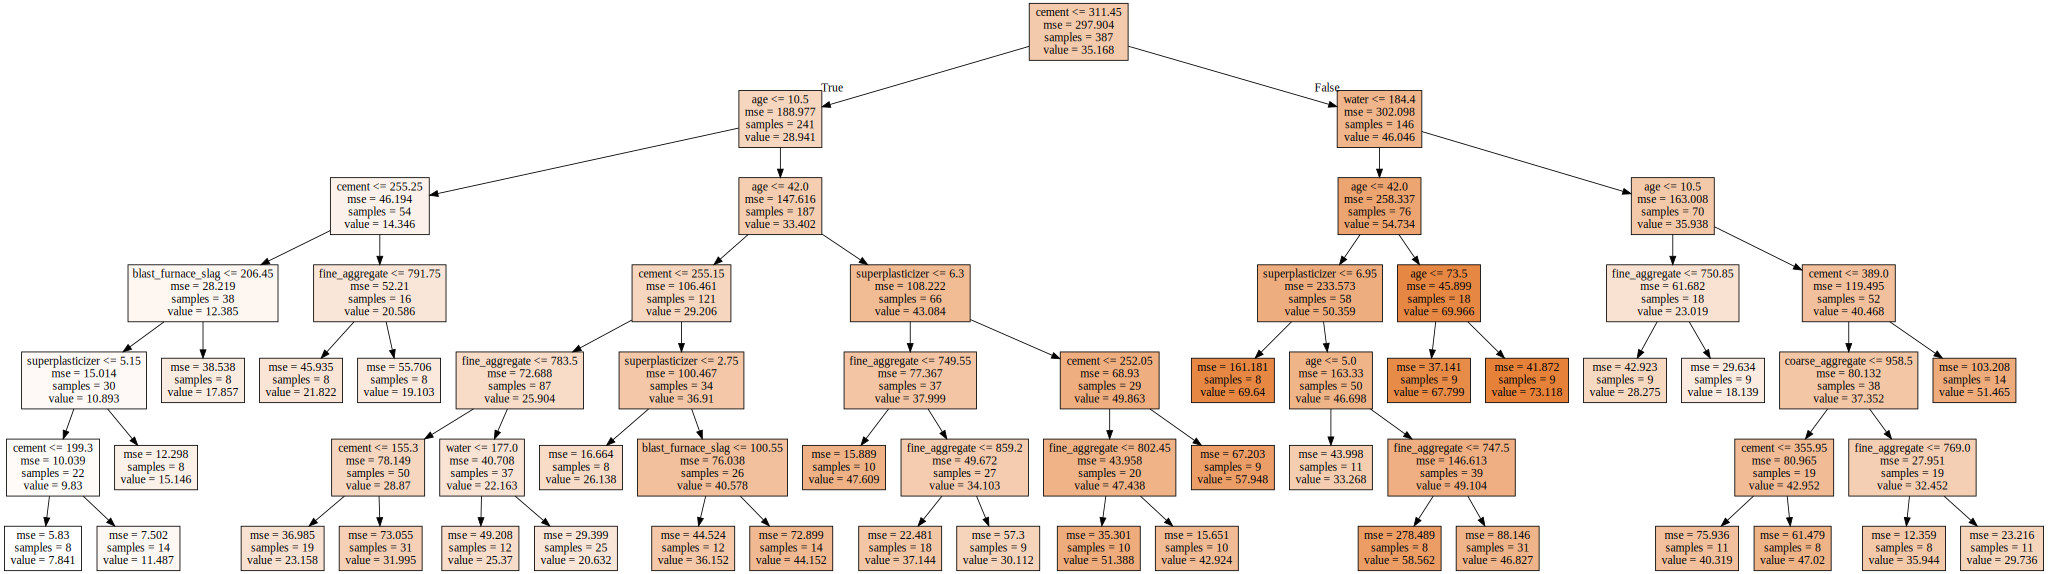

In [112]:
#생성된 트리 200개 중 임의의 3개 확인
#150번째 트리 확인 (최종모델의 10번째 트리 시각화)

v_feature_name = df_train_x.columns #변수명 저장

export_graphviz(rf_final.estimators_[150], out_file='rfr_final_150.dot', feature_names = v_feature_name, impurity=True, filled = True)
with open('rfr_final_150.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [113]:
#설명변수의 중요도 : feature_importances_
#tree.feature_importances_ :설명변수의 중요도 확인 및 테이블로 저장

df_importance = pd.DataFrame()
df_importance['Feature'] =v_feature_name
df_importance['Importance'] =rf_final.feature_importances_

#df_feature_importance 의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)


,Feature,Importance
7,age,0.378
0,cement,0.288
3,water,0.150
4,superplasticizer,0.077
1,blast_furnace_slag,0.047
6,fine_aggregate,0.034
5,coarse_aggregate,0.014
2,fly_ash,0.012


Text(0, 0.5, '변수')

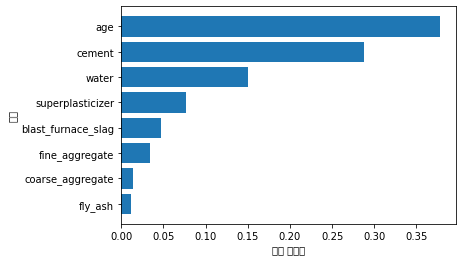

In [115]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### age, cement, water 순으로 영향이 크다고 해석 할 수 있다.
### 단, 계산된 변수의 중요도가 낮아도, 선택되는 데이터에 따라 중요도가 변경 될 수 있으므로, 
### 중요하지 않은 데이터로 단정지어선 안된다.